In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [49]:
## Load the dataset
df = pd.read_csv("concrete.csv")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [28]:
# df.isnull().sum()

In [29]:
col_names = ["cement","slag","ash","water","superplastic","coarseagg","fineagg","age","strength"]
df.columns = col_names

In [30]:
# df[df['age'] > 365]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [31]:
# df[df['age'] < 1]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [32]:
# df.head()

In [33]:
# df.describe()

In [34]:
# Inferences :
# Slag and ash, age has wide difference in mean and 50% values,indicating mean > median, so being a right tailed skewness in data.
# Also, slag and ash, superplastic has min value as 0, which cannot be in he composition of cement.
# in cement., min = 102, std = 104, range is 102 - 540, does the nearing value of std and min indicate something?
# In col Water , std is < min value, shuld we consider this variable for further analysis

# considering the difference b/w ( Q1,median ) and (Q3 and median) in columns slag,ash there are huge number of outliers.
# Other columns has very little diff b/w ( Q1,median ) and (Q3 and median), so there might be 1 or 2 outliers


The data does not contain any missing values or special symbols, but it has 0 value in few columns, which as t be treated.

In [35]:
# how to determine, in each column, with waht we should replace '0' with?
# For now, considering to replace the 

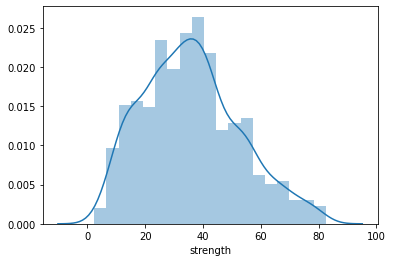

In [36]:
sns.distplot(df['strength'])

In [37]:
# The target variable has the distribution of data to be almost normal, but with lesser values on higher range, / higher values on lesser range
# Let us check the skewness:
print("Skewness = ",df['strength'].skew())

Skewness =  0.41697728841071807


It is positively, lightly skewed, as the skew value is < 0.5.
For analysis, we can log transform this variable for better analysis, optional.

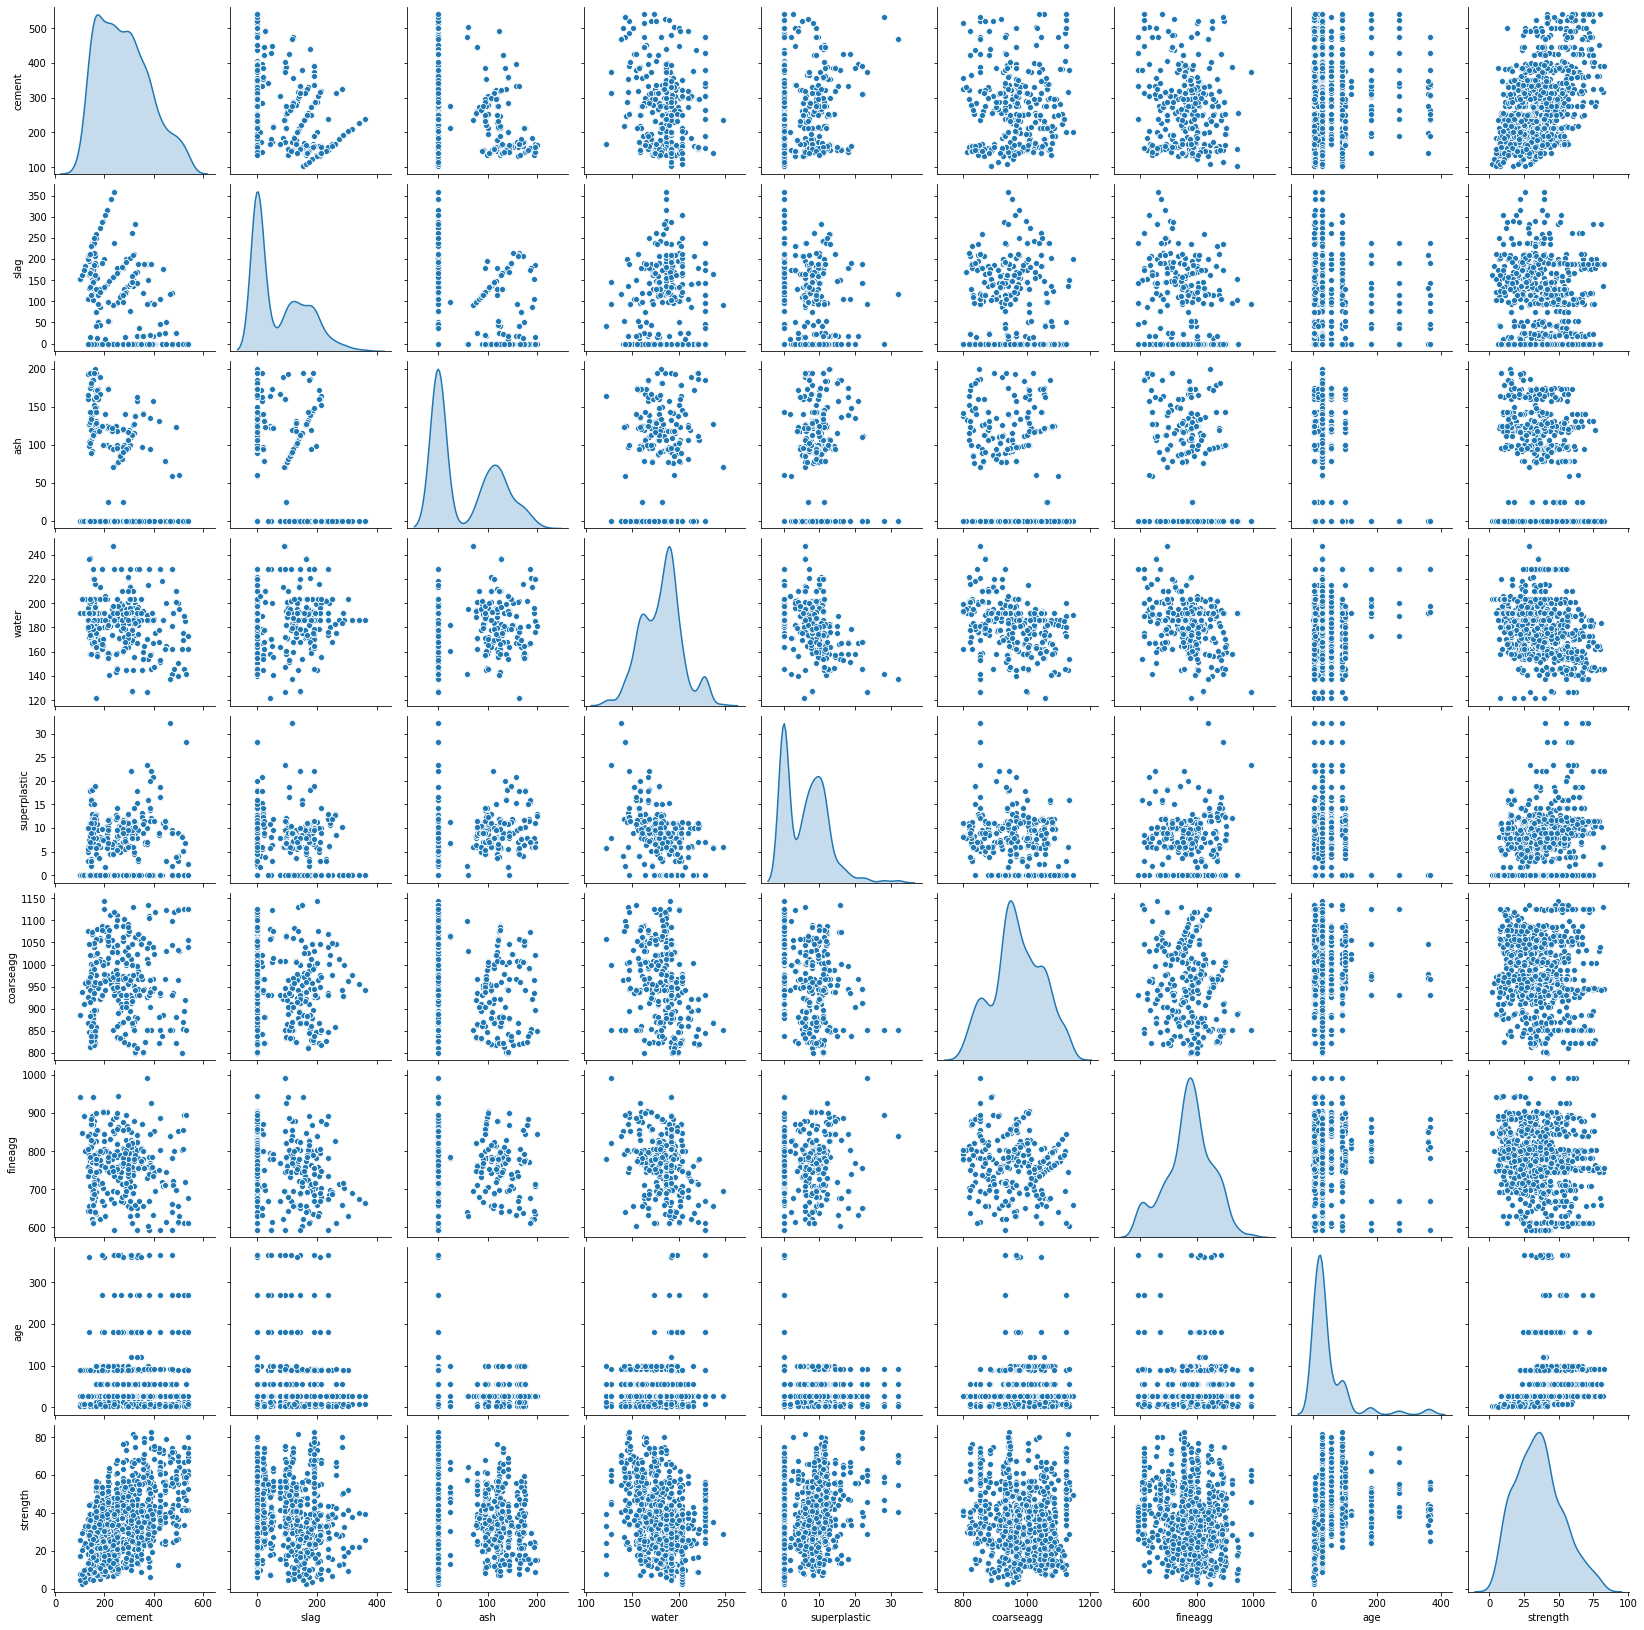

In [38]:
sns.pairplot(df, diag_kind='kde')

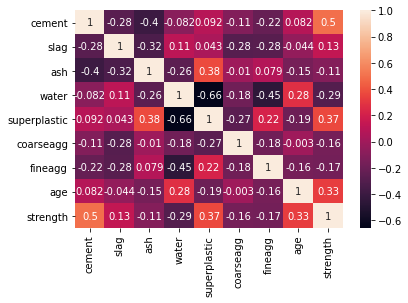

In [39]:
corr_DF = df.corr()
sns.heatmap(corr_DF, annot = True)

In [40]:
data_to_normalize = df.iloc[:,:-1]
scaler = MinMaxScaler()
scaler.fit_transform(data_to_normalize)

array([[0.08972603, 0.58987201, 0.        , ..., 0.49651163, 0.38760662,
        0.07417582],
       [0.15273973, 0.11741792, 0.62118941, ..., 0.81337209, 0.50727546,
        0.03571429],
       [0.33789954, 0.        , 0.47826087, ..., 0.45319767, 0.67034621,
        0.07417582],
       ...,
       [0.39817352, 0.32276016, 0.45127436, ..., 0.20087209, 0.43728048,
        0.07417582],
       [0.54794521, 0.10573178, 0.        , ..., 0.38081395, 0.19066734,
        0.73901099],
       [1.        , 0.        , 0.        , ..., 0.94186047, 0.04766683,
        0.01648352]])

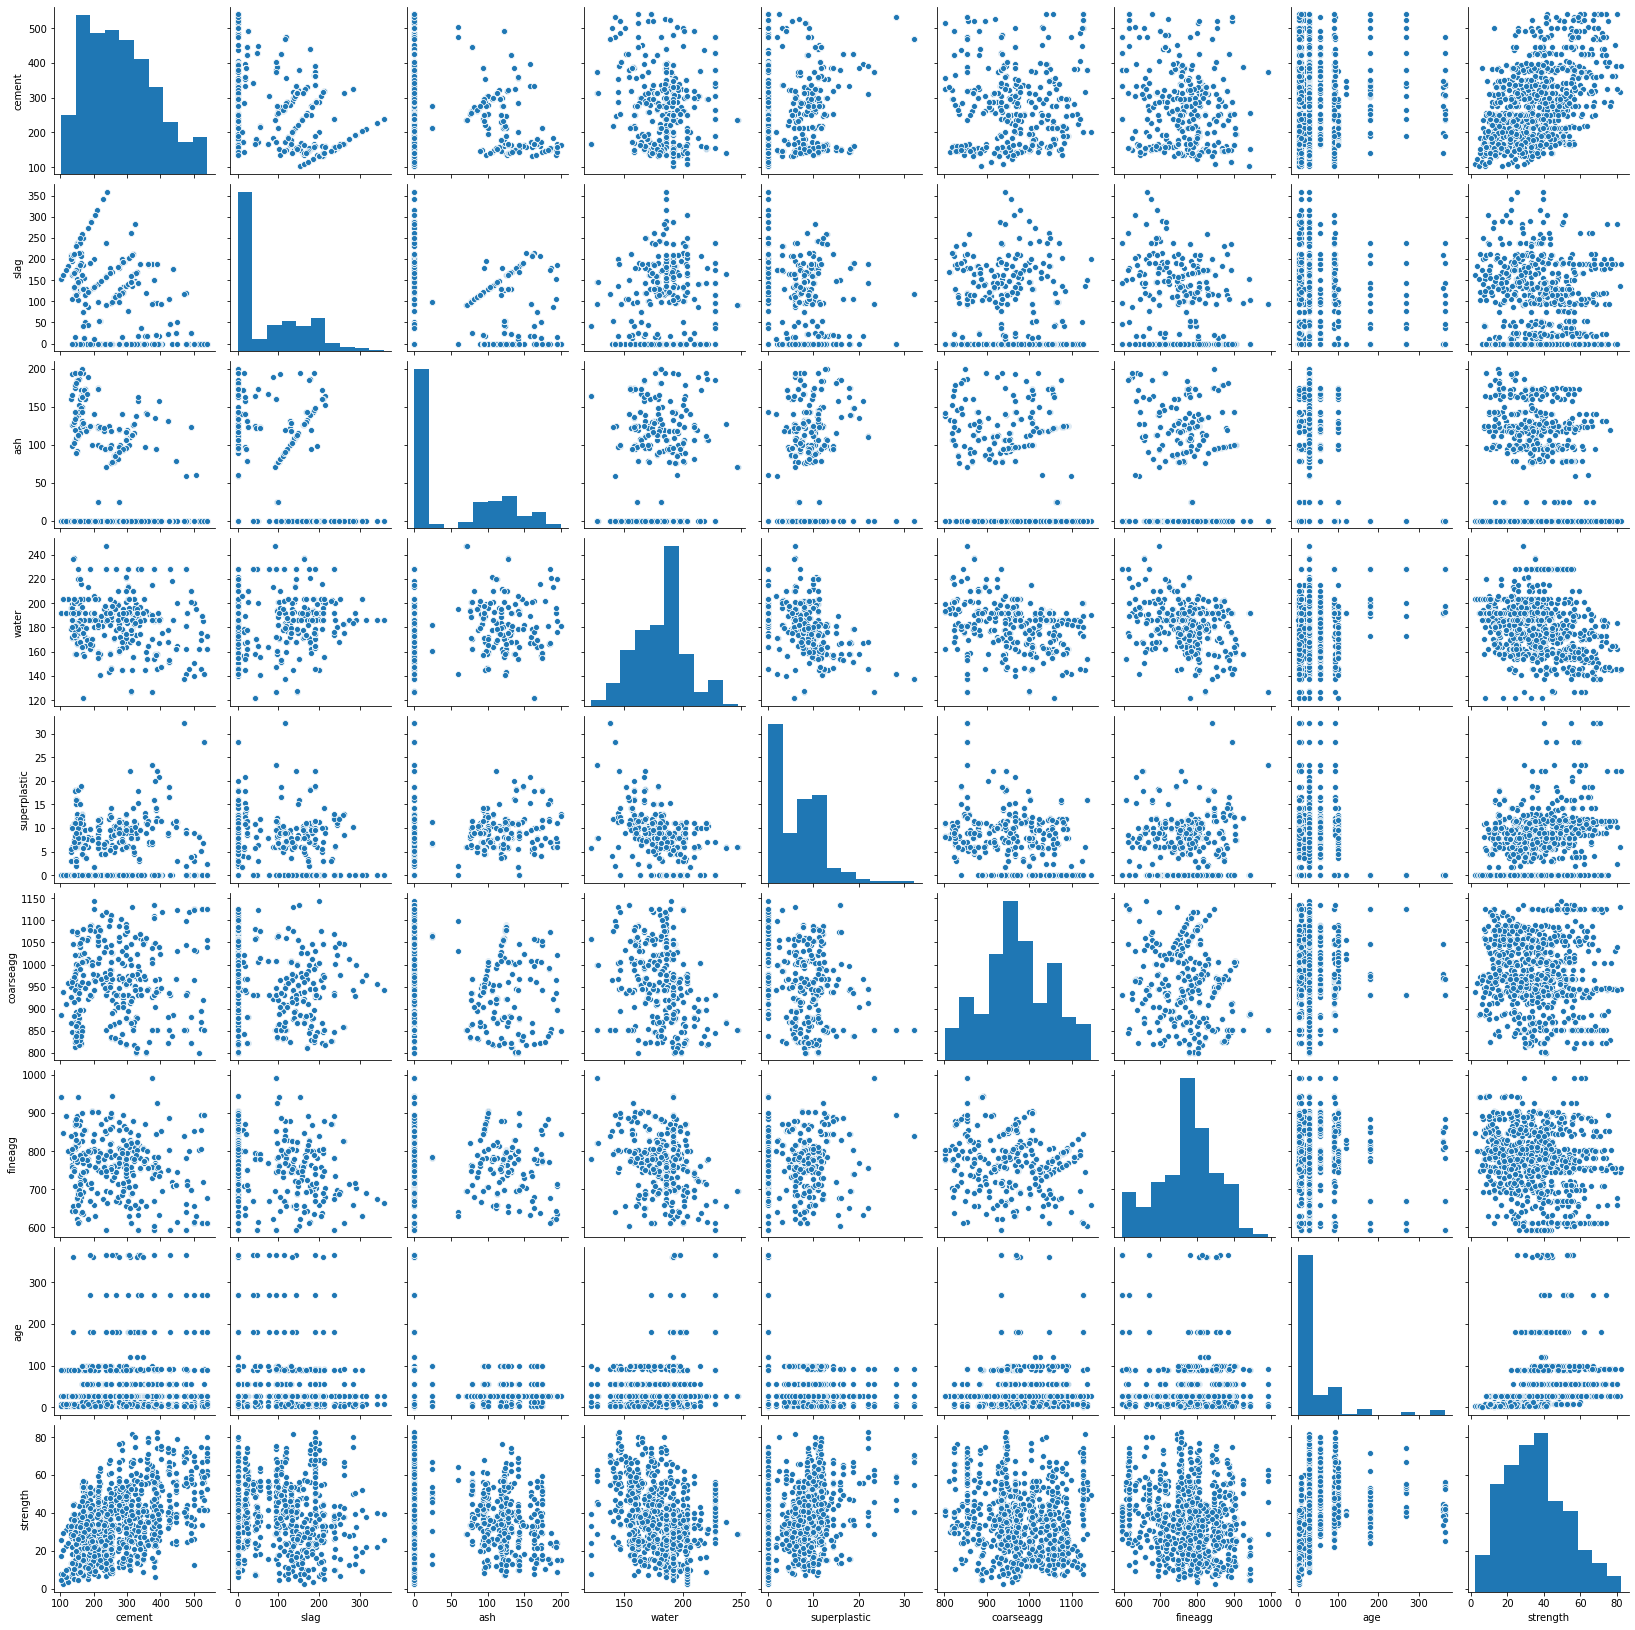

In [41]:
data_to_normalize['strength'] = df['strength']
sns.pairplot(data_to_normalize)

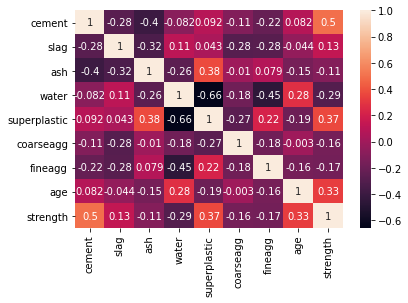

In [42]:
corr_normalised_Data = data_to_normalize.corr()
sns.heatmap(corr_normalised_Data, annot = True)

In [43]:
# The cement Strength can vary between min - 17Mpa , 18-28 Mpa and 28 - <70 Mpa,
#we can have df divided into three.

It is evident that cement and age, superplastic have good positive corr with strength, cement being the strong predictor
Water has a good negative correlation with Strength, where are there are other variables with very less correlation
there are good correlation amng variables :
cement -> Slag = -ve relation and strength-> +ve
Slag -> ash and fineaggg = -ve
Water -> superplastic , fineagg strength = -ve
superplastic -> ash and Strength
positive correlation between water and slag
age -> Strength and water

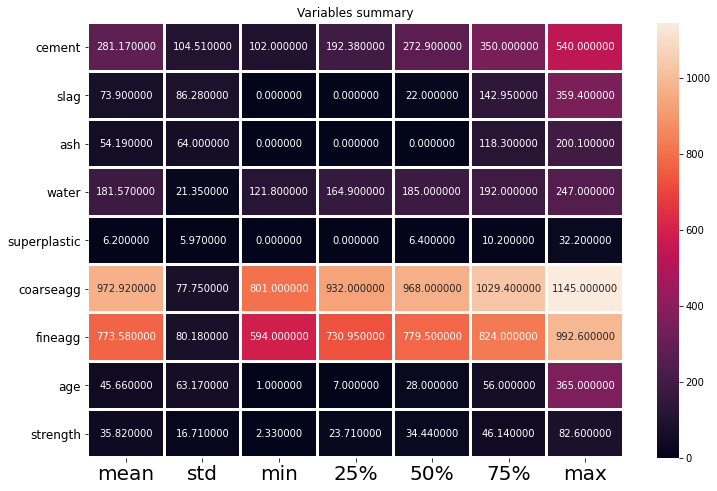

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [45]:
def label(data):
    if data["age"] <= 30:
        return "1 month"
    if data["age"] > 30 and data["age"] <= 60 :
        return "2 months"
    if data["age"] > 60 and data["age"] <= 90 :
        return "3 months"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4 months"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5 months"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6 months"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7 months"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8 months"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9 months"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10 months"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11 months"
    if data["age"] > 330 :
        return "12 months"
df["age_months"] = df.apply(lambda df:label(df) , axis=1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1622: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  barfunc(barpos, self.statistic, self.width,


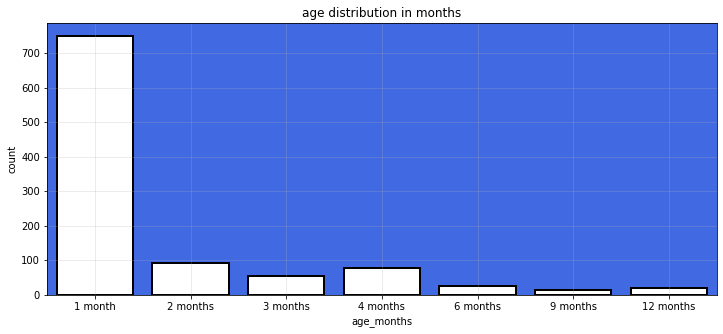

In [46]:
plt.figure(figsize=(12,5))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax = sns.countplot(df["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order),
                   palette=["w"])
ax.set_facecolor("royalblue")
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

In [47]:
df2 = df.copy(deep=True)
def lab(data2):
    if data2["strength"] <= 17:
        return "category 1"
    if data2["strength"] >17 and data2["strength"] <= 28 :
        return "category 2"
    if data2["strength"] >28 :
        return "category 3 "
    
df2["strength_category"] = df2.apply(lambda df2:lab(df2) ,axis =1)